In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/MyDrive/Code/

/content/gdrive/MyDrive/Code


In [ ]:
!ls

drug_dataset.csv    Statistic.ipynb  uncased_L-12_H-768_A-12	  video_1
drug_frequency.png  test.csv	     uncased_L-12_H-768_A-12.zip  Word-Cloud
MedlinePlus_12.csv  train.csv	     valid.csv


In [ ]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')


# Import packages and modules
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# Create a dataframe
import re
from nltk.stem.snowball import SnowballStemmer


import pandas as pd
import numpy as np
from string import punctuation
from collections import Counter
import re
from nltk.tokenize import regexp_tokenize , word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy

import codecs
import os
import random

import string
# from hazm import Lemmatizer , Normalizer
# from hazm import Normalizer as hazm_norm
# from parsivar import Tokenizer , FindStems

import sklearn as sk
import nltk
import matplotlib.pyplot as plt
import re
import seaborn as sns
from nltk.tokenize import regexp_tokenize , word_tokenize 
# from nltk.tokenize import MWETokenizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from hazm import Normalizer, Lemmatizer, WordTokenizer, InformalNormalizer


import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
stop = stopwords.words('english')



import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()


from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import pandas as pd
df = pd.read_csv('drug_dataset.csv')
df = pd.DataFrame(df)
# df.head(3)
content = df['title']
df['title'] = content 
df['title']
# contect.head(3)

0                       Why is this medication prescribed?
1                        How should this medicine be used?
2                             Other uses for this medicine
3                What special precautions should I follow?
4        What special dietary instructions should I fol...
                               ...                        
17738                What other information should I know?
17739                                          Brand names
17740                        In case of emergency/overdose
17741                What other information should I know?
17742                                          Brand names
Name: title, Length: 17743, dtype: object

In [ ]:
df["intent"] = df["title"].str.lower()#.str.split()

In [ ]:
df["intent"] = df["intent"].str.replace('[^\w\s]',' ')

In [ ]:
df["intent"]

0                       why is this medication prescribed 
1                        how should this medicine be used 
2                             other uses for this medicine
3                what special precautions should i follow 
4        what special dietary instructions should i fol...
                               ...                        
17738                what other information should i know 
17739                                          brand names
17740                        in case of emergency overdose
17741                what other information should i know 
17742                                          brand names
Name: intent, Length: 17743, dtype: object

In [ ]:
#Lemmetize
# import nltk

# w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
# lemmatizer = nltk.stem.WordNetLemmatizer()

# def lemmatize_text(text):
#     return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

# df["intent"] = df.intent.apply(lemmatize_text)
##########################################################
#Stemming
import pandas as pd
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")
# df["stemmed"] = df["title"].str.split()
df['intent'] = df["intent"].apply(lambda x: [stemmer.stem(y) for y in w_tokenizer.tokenize(x)]) # Stem every word.

# df = df.drop(columns=['stemmed']) # Get rid of the unstemmed column.
df['intent']

0                         [whi, is, this, medic, prescrib]
1                    [how, should, this, medicin, be, use]
2                         [other, use, for, this, medicin]
3              [what, special, precaut, should, i, follow]
4        [what, special, dietari, instruct, should, i, ...
                               ...                        
17738               [what, other, inform, should, i, know]
17739                                        [brand, name]
17740                       [in, case, of, emerg, overdos]
17741               [what, other, inform, should, i, know]
17742                                        [brand, name]
Name: intent, Length: 17743, dtype: object

In [ ]:
custom_stop_word_list = ['whi']
stop = custom_stop_word_list + stop

df["intent"] = df["intent"].apply(lambda x: [item for item in x if item not in stop])
df["intent"]

0                           [medic, prescrib]
1                              [medicin, use]
2                              [use, medicin]
3                  [special, precaut, follow]
4        [special, dietari, instruct, follow]
                         ...                 
17738                          [inform, know]
17739                           [brand, name]
17740                  [case, emerg, overdos]
17741                          [inform, know]
17742                           [brand, name]
Name: intent, Length: 17743, dtype: object

In [ ]:
# df['intent'] = df["title"]
# df["title"] = content

In [ ]:
tokenized_docss = []
def _remove(text):
    s = " "
    s = s.join(text) 
    return (s)

z = df['intent'].apply(_remove)
df['intent'] = pd.DataFrame(z)
df['intent'].head(3)

0    medic prescrib
1       medicin use
2       use medicin
Name: intent, dtype: object

In [ ]:
df.head(3)

,Section_Number,Link,drug_name,title,text,intent
0,1,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Why is this medication prescribed?,Dalfampridine is used to improve walking in pe...,medic prescrib
1,2,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,How should this medicine be used?,Dalfampridine comes as an extended-release tab...,medicin use
2,3,https://medlineplus.gov/druginfo/meds/a611005....,Dalfampridine,Other uses for this medicine,This medication may be prescribed for other us...,use medicin


##Apply set in each rows of dataframe

In [ ]:
#find max len in df['intent']
i =0
z = pd.DataFrame(df['intent'])



lens =[]
for index, row in z.iterrows():
    i += 1
    lens.append(len(row['intent']))


max_value = max(lens)
print("Max len: ",max_value )
max_index = lens.index(max_value)
print("dataframe len : ",max_index)
print(set(df['intent'][max_index]))
print(df['intent'][max_index])
print(df['title'][max_index])

Max len:  8
dataframe len :  9017
{'pfizer', '19', 'vaccin', 'biontech', 'give', 'covid'}
['pfizer', 'biontech', 'covid', '19', 'vaccin', 'give', 'covid', '19']
Will the Pfizer-BioNTech COVID-19 vaccine give me COVID-19?


In [ ]:

z = pd.DataFrame(df['intent'])

for index, row in z.iterrows():
     df['intent'][index] = set(df['intent'][index])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df['intent']

0                           {medic, prescrib}
1                              {use, medicin}
2                              {use, medicin}
3                  {precaut, follow, special}
4        {dietari, follow, special, instruct}
                         ...                 
17738                          {inform, know}
17739                           {brand, name}
17740                  {case, overdos, emerg}
17741                          {inform, know}
17742                           {brand, name}
Name: intent, Length: 17743, dtype: object

#Category data value count
https://www.educative.io/edpresso/how-to-count-unique-items-in-pandas

In [ ]:
value_bins = df['intent'].value_counts()
print(value_bins)

{use, medicin}                 3075
{inform, know}                 1584
{precaut, follow, special}     1584
{caus, medic, effect, side}    1583
{medic, prescrib}              1583
                               ... 
{rabi}                            1
{vaccin, rabi}                    1
{vaccin, get, rabi}               1
{tell, doctor}                    1
{product, combin}                 1
Name: intent, Length: 128, dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# create a dataframe with one column
# df = pd.DataFrame({"col1": ["a", "b", "a", "c", "a", "a", "a", "c"]})
# print the dataframe object
print(df)
# line break
print("=" * 30)
# counting unique items
item_counts = df["intent"].value_counts()
print(item_counts)

       Section_Number  ...                                intent
0                   1  ...                     {medic, prescrib}
1                   2  ...                        {use, medicin}
2                   3  ...                        {use, medicin}
3                   4  ...            {precaut, follow, special}
4                   5  ...  {dietari, follow, special, instruct}
...               ...  ...                                   ...
17738              10  ...                        {inform, know}
17739              11  ...                         {brand, name}
17740              10  ...                {case, overdos, emerg}
17741              11  ...                        {inform, know}
17742              12  ...                         {brand, name}

[17743 rows x 6 columns]
{use, medicin}                 3075
{inform, know}                 1584
{precaut, follow, special}     1584
{caus, medic, effect, side}    1583
{medic, prescrib}              1583
              

In [ ]:
import pandas as pd
import numpy as np

# create a dataframe with one column
df = pd.DataFrame({"col1": ["a", "b", "a", "c", "a", "a", "a", "c"]})
# print the dataframe object
print(df)
# line break
print("=" * 30)
# counting unique items
item_counts = df["col1"].value_counts()
print(item_counts)

  col1
0    a
1    b
2    a
3    c
4    a
5    a
6    a
7    c
a    5
c    2
b    1
Name: col1, dtype: int64


##Chart in questions

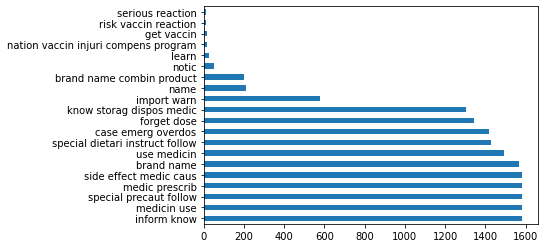

In [ ]:
df["intent"].value_counts()[:20].plot(kind='barh')

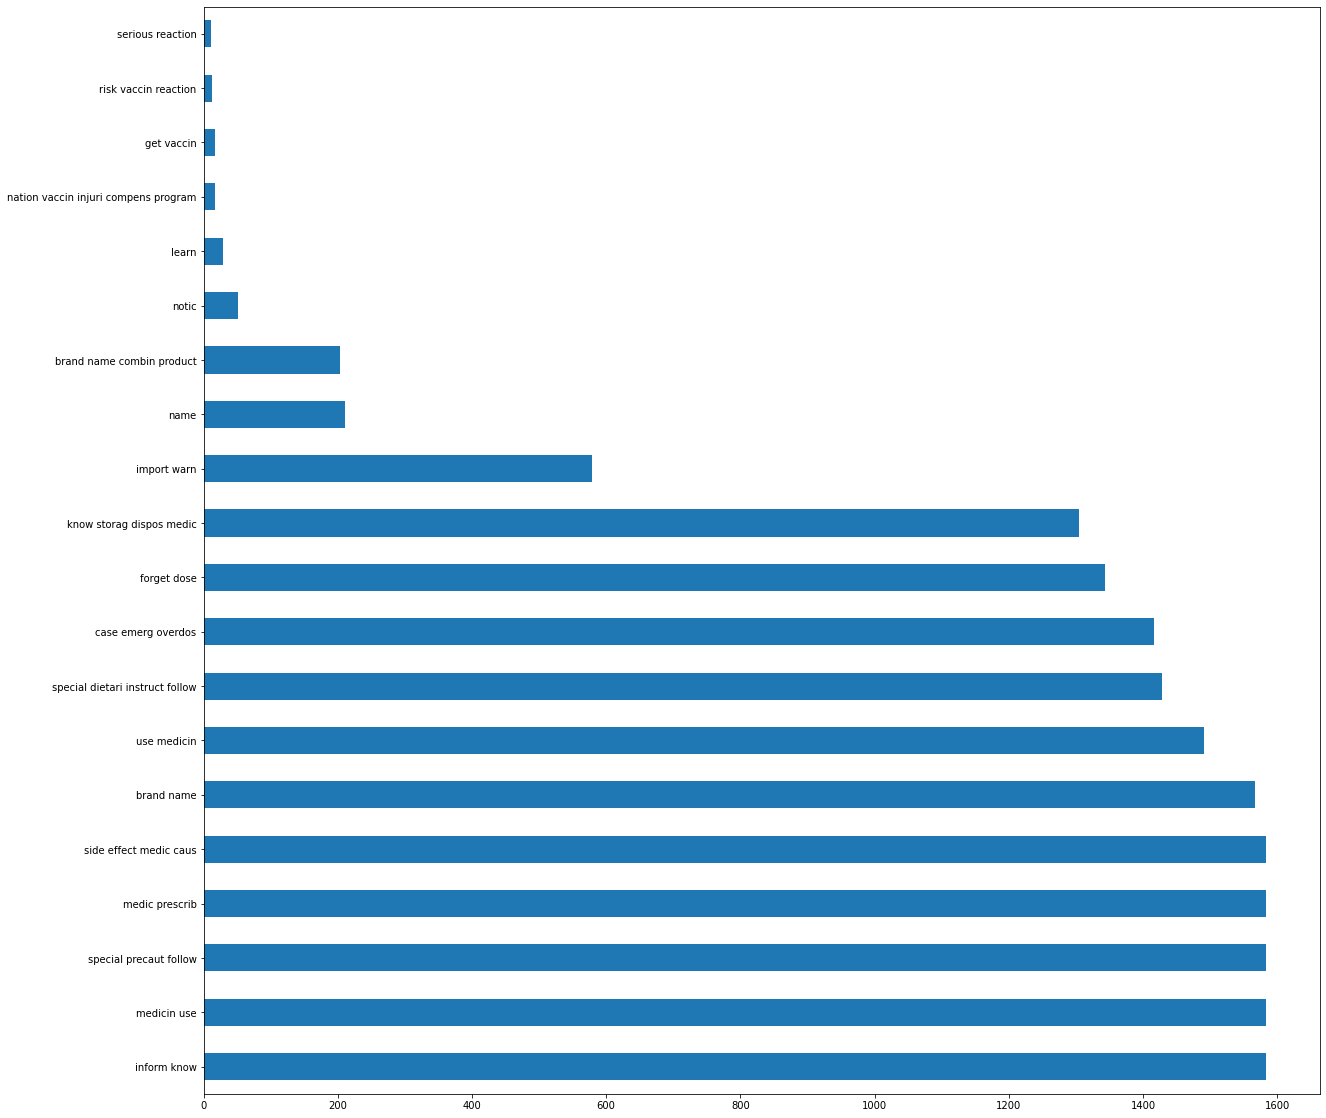

In [ ]:
# df.sort_values(['drug_name' , 'title'], ascending=[True, True], inplace=True)
(df['intent'].value_counts()[:20]).plot.barh(figsize=(20, 20))

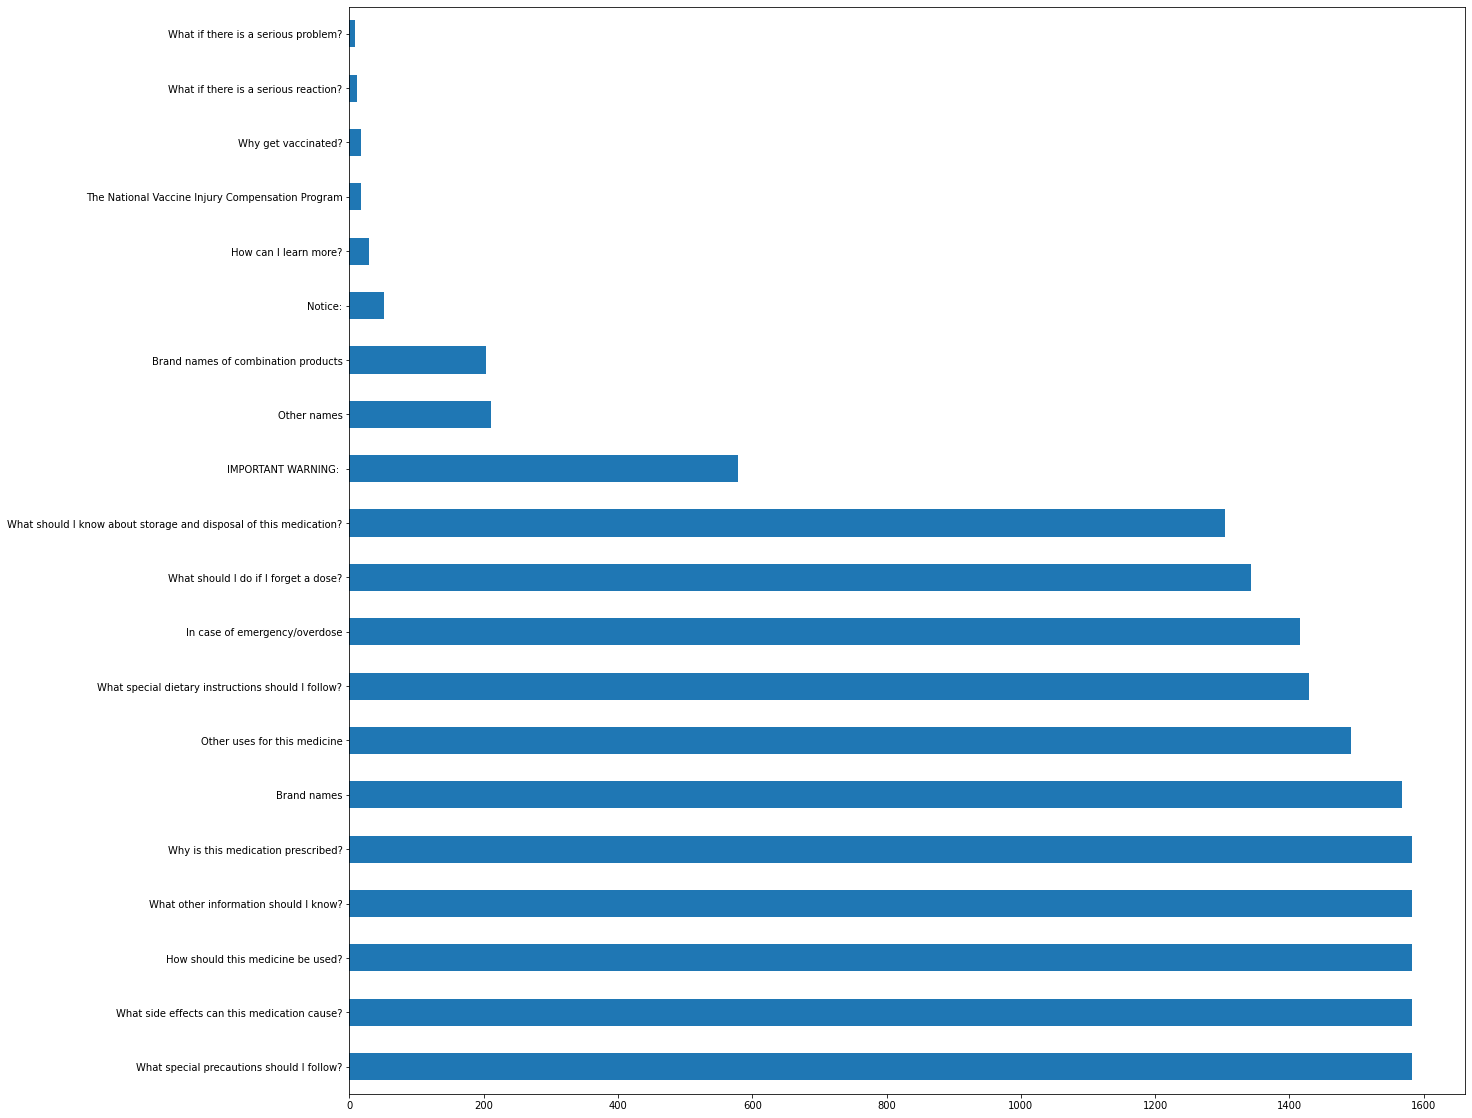

In [ ]:
(df['title'].value_counts()[:20]).plot.barh(figsize=(20, 20))

#####Uniqu drugs Number :  1616
#####Question Numbers:  17743 rows × 5 columns
#####Unique question Number:  139

In [ ]:
questions = set(df['title'].unique())
print("Tedad questions: ", len(questions))
questions = list(questions)
questions.sort()
# drugs

In [ ]:
drugs = set(df['drug_name'].unique())
print("Tedad Daroo: ", len(drugs))
drugs = list(drugs)
drugs.sort()
# drugs

Tedad Daroo:  1616


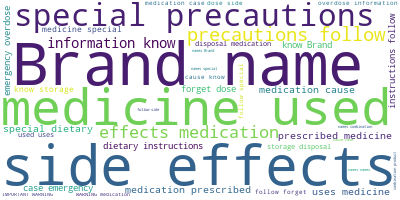

In [ ]:
#Exploratory Analysis

# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df.title))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
comment_words = '' 
stop_words = set(STOPWORDS)

In [ ]:
# Iterating through the .csv data file 
for i in df.title:
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "

In [ ]:
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)

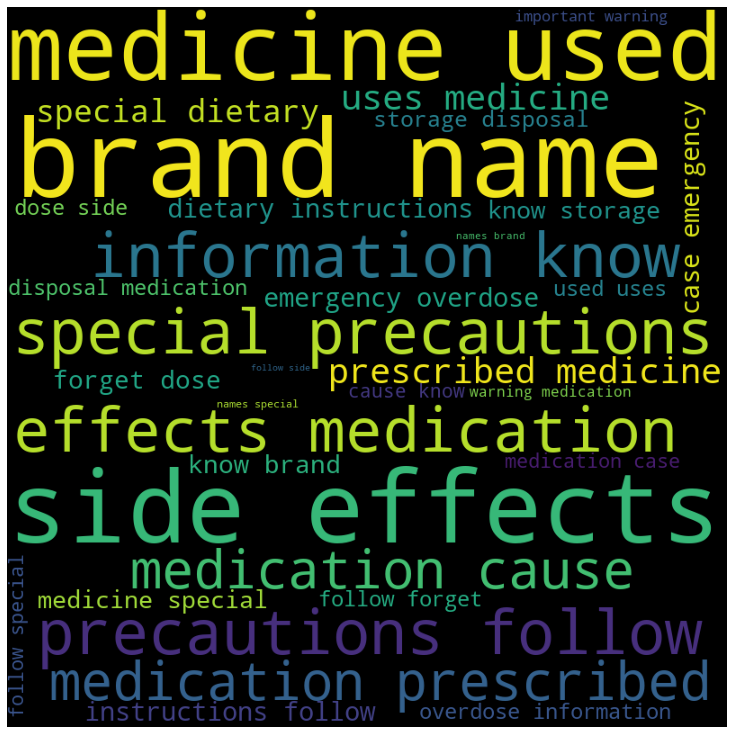

In [ ]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [ ]:
#TF IDF
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
tfidf_vectorizer = TfidfVectorizer(min_df=0.04, max_df=0.3)
tfidf = tfidf_vectorizer.fit_transform(df.intent.values)
terms = tfidf_vectorizer.get_feature_names()
print(tfidf_vectorizer.get_feature_names()[:20])
print(tfidf.shape)

['brand', 'case', 'caus', 'dietari', 'dispos', 'dose', 'effect', 'emerg', 'follow', 'forget', 'inform', 'instruct', 'know', 'medic', 'medicin', 'name', 'overdos', 'precaut', 'prescrib', 'side']
(17743, 23)


In [ ]:
from sklearn.cluster import MiniBatchKMeans


# Using MiniBatchKMean to cluster
n_clusters = 15 #np.arange(9,18,1)
nc = n_clusters
init = ['k-means++','random']
# precompute_distances = [True,False]
algorithm = ['auto', 'elkan']
# c = tfidf_vectorizer.get_feature_names()
# for nc in n_clusters:
for ini in init:
    clust=MiniBatchKMeans(n_clusters=nc, init=ini, batch_size=5000)
    clust.fit(tfidf)
    centers = clust.cluster_centers_.argsort()[:,::-1]
    print("Len of Labels: ",len(set(clust.labels_)), " Params: ", clust.get_params())
    for i in range(0,nc):
        word_list=[]
        print("cluster%d:"% i)
        for j in centers[i,:5]:
            word_list.append(terms[j])
        print(word_list) 
    # evaluate(clust, tfidf)

Len of Labels:  15  Params:  {'batch_size': 5000, 'compute_labels': True, 'init': 'k-means++', 'init_size': None, 'max_iter': 100, 'max_no_improvement': 10, 'n_clusters': 15, 'n_init': 3, 'random_state': None, 'reassignment_ratio': 0.01, 'tol': 0.0, 'verbose': 0}
cluster0:
['inform', 'know', 'use', 'case', 'caus']
cluster1:
['precaut', 'follow', 'special', 'use', 'forget']
cluster2:
['use', 'medicin', 'inform', 'case', 'caus']
cluster3:
['use', 'inform', 'case', 'caus', 'dietari']
cluster4:
['prescrib', 'medic', 'medicin', 'use', 'forget']
cluster5:
['caus', 'side', 'effect', 'medic', 'medicin']
cluster6:
['brand', 'name', 'inform', 'case', 'caus']
cluster7:
['instruct', 'dietari', 'special', 'follow', 'inform']
cluster8:
['overdos', 'case', 'emerg', 'use', 'inform']
cluster9:
['dose', 'forget', 'use', 'inform', 'case']
cluster10:
['dispos', 'storag', 'know', 'medic', 'use']
cluster11:
['name', 'use', 'inform', 'case', 'caus']
cluster12:
['case', 'use', 'inform', 'caus', 'dietari']
clu